In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.chunk import RegexpParser
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from tabulate import tabulate
from nltk.corpus import wordnet
from nltk import ne_chunk


In [22]:
df=pd.read_csv("C:\\Users\\SHANMUGAPRIYAA\\Downloads\\mtsamples.csv\\mtsamples.csv")
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [23]:
df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [25]:
df.describe()

,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


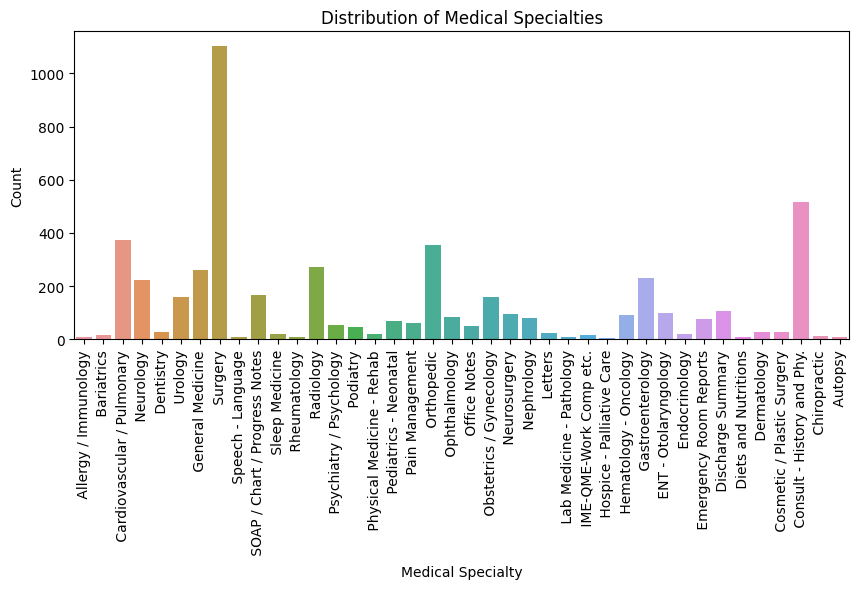

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(x='medical_specialty', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.title('Distribution of Medical Specialties')
plt.show()

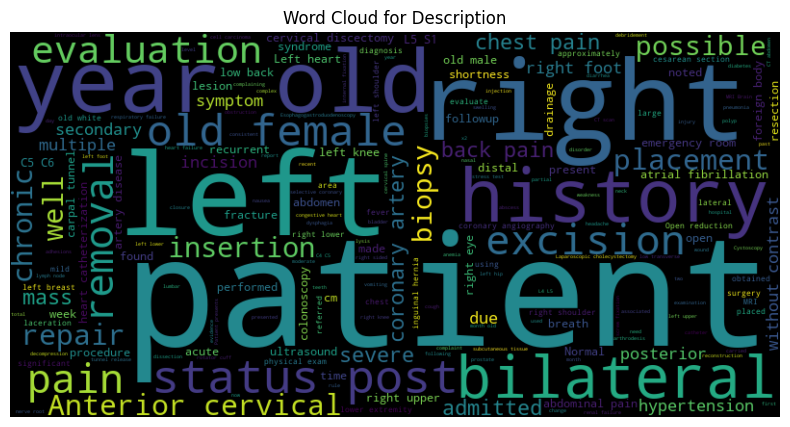

In [27]:
from wordcloud import WordCloud

text = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Description')
plt.show()

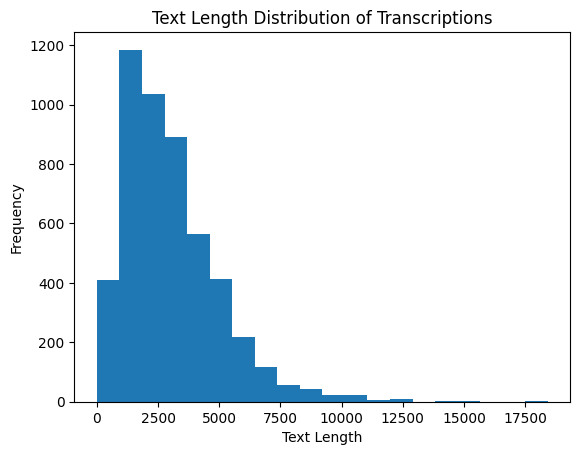

In [28]:
df['transcription'] = df['transcription'].astype(str)
df['transcription'].apply(len).plot(kind='hist', bins=20)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution of Transcriptions')
plt.show()


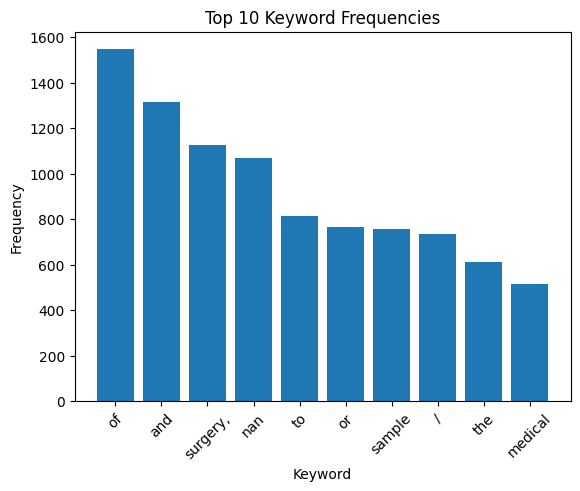

In [29]:
from collections import Counter
df['keywords'] = df['keywords'].astype(str)
keywords = ' '.join(df['keywords']).split()
keyword_counts = Counter(keywords)
top_keywords = keyword_counts.most_common(10)
plt.bar([k[0] for k in top_keywords], [k[1] for k in top_keywords])
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 10 Keyword Frequencies')
plt.xticks(rotation=45)
plt.show()

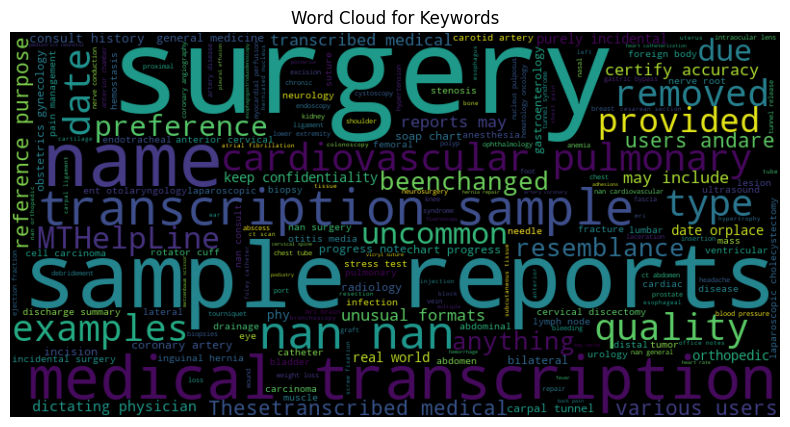

In [30]:
text = ' '.join(df['keywords'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Keywords')
plt.show()

In [31]:
grammar = r"""
    NP: {<DT|JJ|NN.*>+}
    PP: {<IN><NP>}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    CLAUSE: {<NP><VP>}
"""

In [32]:
chunk_parser = RegexpParser(grammar)
sample_report_number = int(input("Enter the sample report number: "))
results = []

Enter the sample report number: 2


In [33]:
transcription = df.loc[sample_report_number, 'transcription']
print(transcription)

HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes,

In [34]:
for index, row in df.iterrows():
    if index + 1 == sample_report_number:
        transcription = row['transcription']
        tokens = word_tokenize(transcription)
        pos_tags = pos_tag(tokens)
        tree = chunk_parser.parse(pos_tags)
        tree_str = tree.pformat()
        results.append([f"Chunking Result for Sample {sample_report_number}", tree_str])
        break 
print(tabulate(results, tablefmt="grid"))

+------------------------------+-----------------------------------------------------+
| Chunking Result for Sample 2 | (S                                                  |
|                              |   (NP PAST/NNP MEDICAL/NNP HISTORY/NNP)             |
|                              |   :/:                                               |
|                              |   ,/,                                               |
|                              |   He/PRP                                            |
|                              |   has/VBZ                                           |
|                              |   (NP difficulty/NN)                                |
|                              |   climbing/VBG                                      |
|                              |   (NP stairs/NNS)                                   |
|                              |   ,/,                                               |
|                              |   (NP diff

In [35]:
tokens = word_tokenize(transcription)
pos_tags = pos_tag(tokens)
ne_tree = ne_chunk(pos_tags)
ner_results = []

In [36]:
for subtree in ne_tree:
    if isinstance(subtree, nltk.Tree):
        entity_name = " ".join([word for word, tag in subtree.leaves()])
        entity_type = subtree.label()
        ner_results.append((entity_name, entity_type))

In [37]:
print("\nNER Results:")
print(tabulate(ner_results, headers=["Entity Name", "Entity Type"], tablefmt="grid"))


NER Results:
+---------------+---------------+
| Entity Name   | Entity Type   |
+===============+===============+
| PAST          | ORGANIZATION  |
+---------------+---------------+
| MEDICAL       | ORGANIZATION  |
+---------------+---------------+
| PAST          | ORGANIZATION  |
+---------------+---------------+
| Includes      | GPE           |
+---------------+---------------+
| SOCIAL        | ORGANIZATION  |
+---------------+---------------+
| FAMILY        | ORGANIZATION  |
+---------------+---------------+
| Heart         | PERSON        |
+---------------+---------------+
| Denies        | PERSON        |
+---------------+---------------+
| CURRENT       | ORGANIZATION  |
+---------------+---------------+
| Lynn Holmberg | PERSON        |
+---------------+---------------+
| Greenwich     | GPE           |
+---------------+---------------+
| Eastchester   | GPE           |
+---------------+---------------+
| New York      | GPE           |
+---------------+---------------+


In [38]:
import spacy
nlp = spacy.load("en_core_web_sm")
transcription = df.loc[sample_report_number, 'transcription']
doc = nlp(transcription)
sentences = list(doc.sents)
first_sentence = sentences[0].text
print("First Sentence in the Transcription:")
print(first_sentence)

C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


First Sentence in the Transcription:
HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  


In [39]:
sample_text = first_sentence
doc = nlp(sample_text)
pos_results = []
dep_results = []
for token in doc:
    pos_results.append([token.text, token.pos_])
    dep_results.append([token.text, token.dep_, token.head.text])
pos_table = tabulate(pos_results, headers=["Token", "POS Tag"], tablefmt="pretty")
dep_table = tabulate(dep_results, headers=["Token", "Dependency", "Head"], tablefmt="pretty")

In [40]:
print("Part-of-Speech (POS) tagging:")
print(pos_table)

Part-of-Speech (POS) tagging:
+---------+---------+
|  Token  | POS Tag |
+---------+---------+
| HISTORY |  NOUN   |
|   OF    |   ADP   |
| PRESENT |  PROPN  |
| ILLNESS |  PROPN  |
|    :    |  PUNCT  |
|    ,    |  PUNCT  |
|    I    |  PRON   |
|  have   |   AUX   |
|  seen   |  VERB   |
|   ABC   |  PROPN  |
|  today  |  NOUN   |
|    .    |  PUNCT  |
|         |  SPACE  |
+---------+---------+


In [41]:
print("\nDependency parsing:")
print(dep_table)


Dependency parsing:
+---------+------------+---------+
|  Token  | Dependency |  Head   |
+---------+------------+---------+
| HISTORY |   nsubj    |  seen   |
|   OF    |    prep    | HISTORY |
| PRESENT |  compound  | ILLNESS |
| ILLNESS |    pobj    |   OF    |
|    :    |   punct    |  seen   |
|    ,    |   punct    |  seen   |
|    I    |   nsubj    |  seen   |
|  have   |    aux     |  seen   |
|  seen   |    ROOT    |  seen   |
|   ABC   |    dobj    |  seen   |
|  today  |  npadvmod  |  seen   |
|    .    |   punct    |  seen   |
|         |    dep     |    .    |
+---------+------------+---------+


In [42]:
lemmatizer = nltk.WordNetLemmatizer()
tokenized_transcription = nltk.word_tokenize(transcription)
lemmatized_transcription = [lemmatizer.lemmatize(word) for word in tokenized_transcription]

In [43]:
term_to_find_synonyms_for = input("Enter the term to find synonyms for: ")
synsets = wordnet.synsets(term_to_find_synonyms_for)
synonyms = []

Enter the term to find synonyms for: was


In [44]:
for synset in synsets:
    synonyms.extend(synset.lemma_names())
if synonyms:
    print(f"Synonyms for '{term_to_find_synonyms_for}':")
    print(synonyms)
print("\nRelated sentences in the transcription:")
for sentence in transcription.split('.'):
    if any(synonym.lower() in sentence.lower() for synonym in synonyms):
        print(sentence.strip() + '.')

Synonyms for 'was':
['Washington', 'Evergreen_State', 'WA', 'be', 'be', 'be', 'exist', 'be', 'be', 'equal', 'be', 'constitute', 'represent', 'make_up', 'comprise', 'be', 'be', 'follow', 'embody', 'be', 'personify', 'be', 'be', 'live', 'be', 'cost', 'be']

Related sentences in the transcription:
He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.
He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.
He wants to be able to exercise and play volleyball.
When he loses weight he always regains it and he gains back more than he lost.
His biggest weight loss is 25 pounds and it was three months before he gained it back.
He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.
,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public se